In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

bike_df = pd.read_csv('dataset/bike_train.csv')
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [2]:
# 자전거 대여 수

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [115]:
df  = bike_df.copy()

In [116]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


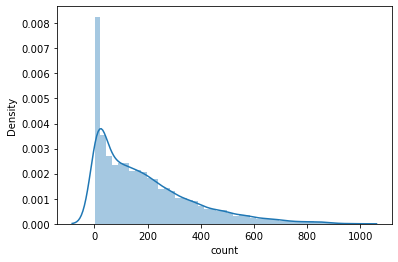

In [125]:
# 종속변수 정규성 개선을 위한 로그변환
sns.distplot(df['count']) 

df['L-count'] = np.log1p(df['count'])

<AxesSubplot:xlabel='L-count', ylabel='Density'>

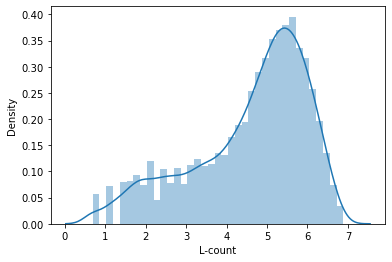

In [18]:
sns.distplot(df['L-count'])

In [117]:
# 문자열을 datetime타입으로 변경
import datetime
df['Time'] = pd.to_datetime(df['datetime'])

In [118]:
# 년,월,일,시간
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour

In [5]:
df_season = bike_df.groupby('season')
list(df_season)

[(1,
                   datetime  season  holiday  workingday  weather   temp  \
  0     2011-01-01 00:00:00       1        0           0        1   9.84   
  1     2011-01-01 01:00:00       1        0           0        1   9.02   
  2     2011-01-01 02:00:00       1        0           0        1   9.02   
  3     2011-01-01 03:00:00       1        0           0        1   9.84   
  4     2011-01-01 04:00:00       1        0           0        1   9.84   
  ...                   ...     ...      ...         ...      ...    ...   
  6780  2012-03-19 19:00:00       1        0           1        1  25.42   
  6781  2012-03-19 20:00:00       1        0           1        1  24.60   
  6782  2012-03-19 21:00:00       1        0           1        1  24.60   
  6783  2012-03-19 22:00:00       1        0           1        2  22.96   
  6784  2012-03-19 23:00:00       1        0           1        2  22.96   
  
         atemp  humidity  windspeed  casual  registered  count  
  0     14.395 

In [119]:
def season (x):
    if x == 1 : return 'spring'
    elif x == 2 : return 'summer'
    elif x == 3 : return 'fall'
    else : return 'winter'
     
df['계절'] = df.season.apply(season)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Time,year,month,day,hour,계절
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01 00:00:00,2011,1,1,0,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01 01:00:00,2011,1,1,1,spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01 02:00:00,2011,1,1,2,spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01 03:00:00,2011,1,1,3,spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01 04:00:00,2011,1,1,4,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19 19:00:00,2012,12,19,19,winter
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19 20:00:00,2012,12,19,20,winter
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19 21:00:00,2012,12,19,21,winter
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19 22:00:00,2012,12,19,22,winter


In [132]:
drop_columns = ['casual','registered']
df.drop(drop_columns, axis =1,inplace =True)

In [133]:
df

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,fall,spring,summer,winter,L-count
0,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,0,1,0,0,2.833213
1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,0,1,0,0,3.713572
2,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,0,1,0,0,3.496508
3,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,0,1,0,0,2.639057
4,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,0,1,0,0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,0,0,0,1,5.820083
10882,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,0,0,0,1,5.488938
10883,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,0,0,0,1,5.129899
10884,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,0,0,0,1,4.867534


In [120]:
df = df.drop(['datetime', 'season','Time'],axis =1 )

In [122]:
tdf = pd.get_dummies(df.계절)
df = pd.concat([df,tdf],axis =1)

df

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,계절,fall,spring,summer,winter
0,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,spring,0,1,0,0
1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,spring,0,1,0,0
2,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,spring,0,1,0,0
3,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,spring,0,1,0,0
4,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,spring,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,winter,0,0,0,1
10882,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,winter,0,0,0,1
10883,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,winter,0,0,0,1
10884,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,winter,0,0,0,1


In [123]:
df  = df.drop('계절', axis =1 )

<AxesSubplot:xlabel='계절'>

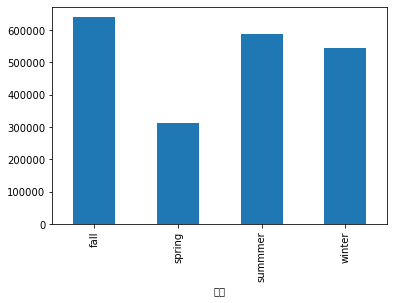

In [57]:
sum = df.groupby('계절').sum()['count']
sum.plot(kind = 'bar')

In [60]:
df.계절.isnull().sum()

0

계절
fall       AxesSubplot(0.125,0.125;0.775x0.755)
spring     AxesSubplot(0.125,0.125;0.775x0.755)
summmer    AxesSubplot(0.125,0.125;0.775x0.755)
winter     AxesSubplot(0.125,0.125;0.775x0.755)
Name: count, dtype: object

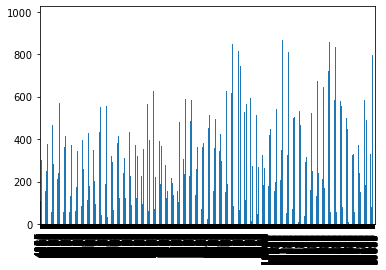

In [46]:
mean = df.groupby('계절')['count']
mean.plot(kind = 'bar')

winter     2734
fall       2733
summmer    2733
spring     2686
Name: 계절, dtype: int64

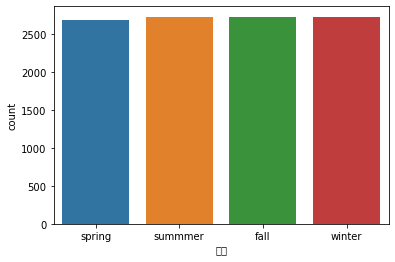

In [61]:
sns.countplot("계절",data = df )
df.계절.value_counts()

In [135]:
X

,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,fall,spring,summer,winter
0,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0,0,1,0,0
1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1,0,1,0,0
2,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2,0,1,0,0
3,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3,0,1,0,0
4,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19,0,0,0,1
10882,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20,0,0,0,1
10883,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21,0,0,0,1
10884,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22,0,0,0,1


In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def rmsle(y,pred):
    log_y  = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE:{0:.4f}, RMSE:{1:.4f}, MAE:{2:.4f}'.format(rmsle_val, rmse_val,mae_val))

In [143]:
# 종속변수에 로그처리를 안한

X = df.drop(['count','L-count'],axis=1)
y_log = df['L-count']
y = df['count']
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                       test_size = 0.3, random_state = 0 )
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE:1.1569, RMSE:140.3482, MAE:105.6121


In [147]:
X = df.drop(['count','L-count'],axis=1)
y_log = df['L-count']
y = df['count']
X_train , X_test , y_train , y_test = train_test_split(X,y_log,
                                                       test_size = 0.3, random_state = 0 )
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp =np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)

RMSLE:1.0124, RMSE:160.9779, MAE:107.9113


In [ ]:
coef = pd.Series(lr_reg.coef_, index )